## Applying to the LIGO data of gravitational wave, GW150914
last update: 9/30 (2017)

In [1]:
import DSP
using PyPlot

In [2]:
include("../juwvid.jl")

juwvid

In [3]:
### Using LIGO data, provided by https://losc.ligo.org/events/GW150914/ 
data=readdlm("fig1-observed-H.txt"); # Hanford: Get from https://ligo.caltech.edu/WA
t=data[:,1]
y=data[:,2];
data=readdlm("fig1-observed-L.txt"); # Livingston: Get from https://ligo.caltech.edu/LA
t2=data[:,1]
y2=data[:,2];

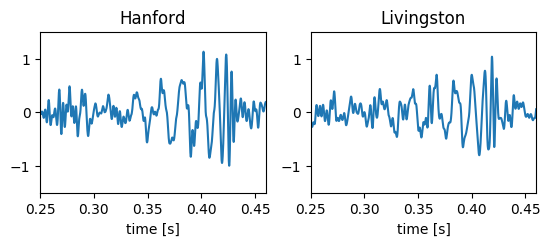

PyObject <matplotlib.text.Text object at 0x7f6af8fc2d30>

In [4]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1,aspect=0.05)
PyPlot.plot(t,y)
PyPlot.xlabel("time [s]")
PyPlot.xlim(0.25,0.46)
PyPlot.ylim(-1.5,1.5)
PyPlot.title("Hanford")
ax = fig[:add_subplot](1,2,2,aspect=0.05)
PyPlot.plot(t,y2)
PyPlot.xlim(0.25,0.46)
PyPlot.ylim(-1.5,1.5)
PyPlot.title("Livingston")
PyPlot.xlabel("time [s]")

In [10]:
# compute frequency indices corresponding to 0-500 Hz 
dt=t[2]-t[1]
nufft=1024
juwutils.frequency_to_index([0.0,500.0], dt, length(y),nufft)

2-element Array{Float64,1}:
   0.0  
 210.022

In [11]:
# define the frequency range
fin=collect(linspace(1.0,211.0,nufft));
# compute the analytic signals
z=DSP.Util.hilbert(y); 
z2=DSP.Util.hilbert(y2); 

### STFT

In [7]:
tfrst=stft.tfrstft(y);
tfrst2=stft.tfrstft(y2);

Use fft.
Use fft.


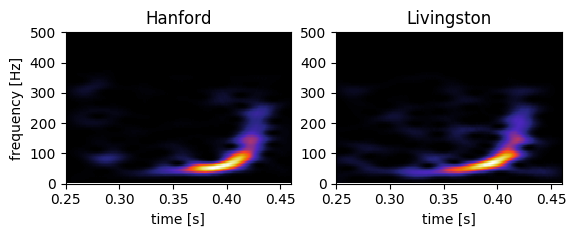

(0, 500)

In [8]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.wtfrshow(abs.(tfrst).*abs.(tfrst),t[2]-t[1],t[1],t[end],NaN,NaN,11.0)
PyPlot.xlabel("time [s]")
PyPlot.ylabel("frequency [Hz]")
PyPlot.title("Hanford")
PyPlot.ylim(0,500)
ax = fig[:add_subplot](1,2,2)
a=juwplot.wtfrshow(abs.(tfrst2).*abs.(tfrst2),t[2]-t[1],t[1],t[end],NaN,NaN,11.0)
PyPlot.title("Livingston")
PyPlot.xlabel("time [s]")
PyPlot.ylim(0,500)

### Wigner Ville Distribution

In [30]:
include("../cohenclass.jl")
tfrwv=cohenclass.tfrwv(z,NaN,NaN,fin,NaN,0,"nufft");
tfrwv2=cohenclass.tfrwv(z2,NaN,NaN,fin,NaN,0,"nufft");

Single Wigner Ville


Use nufft.
Single Wigner Ville
Use nufft.


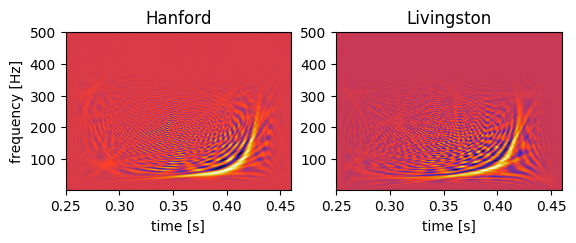

PyObject <matplotlib.text.Text object at 0x7f6aec896ba8>

In [32]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.tfrshow(tfrwv,dt,t[1],t[end],fin[1],fin[end],0.7)
PyPlot.xlabel("time [s]")
PyPlot.ylabel("frequency [Hz]")
PyPlot.title("Hanford")
ax = fig[:add_subplot](1,2,2)
a=juwplot.tfrshow(tfrwv2,dt,t[1],t[end],fin[1],fin[end],0.7)
PyPlot.title("Livingston")
PyPlot.xlabel("time [s]")

### Pseudo Wigner Ville Distribution

In [33]:
tfrpwv=cohenclass.tfrpwv(z,NaN,NaN,fin,NaN,NaN,0,"nufft");
tfrpwv2=cohenclass.tfrpwv(z2,NaN,NaN,fin,NaN,NaN,0,"nufft");

Single pseudo Wigner Ville
Use nufft.
Single pseudo Wigner Ville
Use nufft.


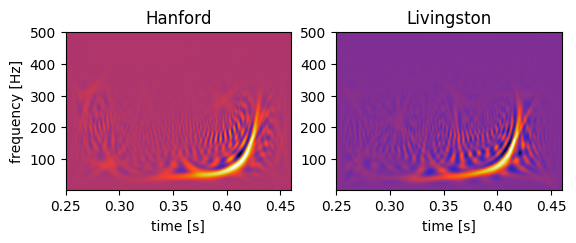

PyObject <matplotlib.text.Text object at 0x7f6aec79ba20>

In [34]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.tfrshow(tfrpwv,dt,t[1],t[end],fin[1],fin[end],0.7)
PyPlot.xlabel("time [s]")
PyPlot.ylabel("frequency [Hz]")
PyPlot.title("Hanford")
ax = fig[:add_subplot](1,2,2)
a=juwplot.tfrshow(tfrpwv2,dt,t[1],t[end],fin[1],fin[end],0.7)
PyPlot.title("Livingston")
PyPlot.xlabel("time [s]")

### L-wigner distribution

In [35]:
#alias free sm
afwv=smethod.tfrsm(y,4,NaN,2)
afwv2=smethod.tfrsm(y2,4,NaN,2)
#L wigner distribution (L=2)
tfrlw=lwigner.tfrlw2L(afwv,4);
tfrlw2=lwigner.tfrlw2L(afwv2,4);

Use fft.
Use fft.


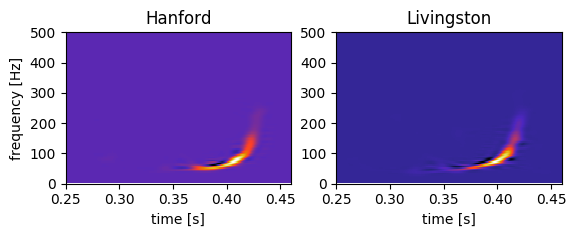

(0, 500)

In [36]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.wtfrshow(tfrlw,t[2]-t[1],t[1],t[end],NaN,NaN,11.0)
PyPlot.xlabel("time [s]")
PyPlot.ylabel("frequency [Hz]")
PyPlot.title("Hanford")
PyPlot.ylim(0,500)
ax = fig[:add_subplot](1,2,2)
a=juwplot.wtfrshow(tfrlw2,t[2]-t[1],t[1],t[end],NaN,NaN,11.0)
PyPlot.title("Livingston")
PyPlot.xlabel("time [s]")
PyPlot.ylim(0,500)

### polynomial Wigner Ville distribution

In [37]:
tfrpo=polywv.tfrpowv(y,NaN,NaN,fin,8,8);
tfrpo2=polywv.tfrpowv(y2,NaN,NaN,fin,8,8);

Use nufft.
Use nufft.


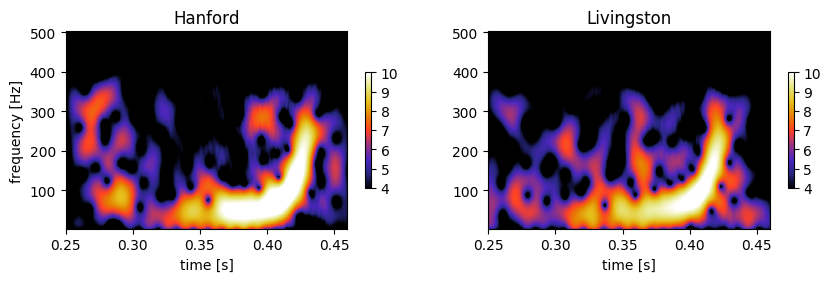

PyObject <matplotlib.text.Text object at 0x7f6aebb4cb38>

In [49]:
fig=PyPlot.figure(figsize=(10,5))
ax = fig[:add_subplot](1,2,1)
a=juwplot.wtfrshow(log10.(complex(tfrpo)),dt,t[1],t[end],fin[1],fin[end],0.7,"CMRmap",4,10)
PyPlot.colorbar(a,shrink=0.3)
PyPlot.xlabel("time [s]")
PyPlot.ylabel("frequency [Hz]")
PyPlot.title("Hanford")
ax = fig[:add_subplot](1,2,2)
a=juwplot.wtfrshow(log10.(complex(tfrpo2)),dt,t[1],t[end],fin[1],fin[end],0.7,"CMRmap",4,10)
PyPlot.colorbar(a,shrink=0.3)
PyPlot.title("Livingston")
PyPlot.xlabel("time [s]")

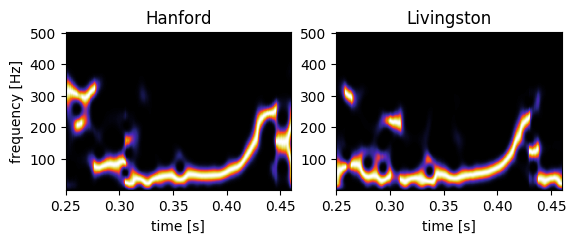

PyObject <matplotlib.text.Text object at 0x7f6aeb7b0fd0>

In [51]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.wtfrshow(tfrpo./maximum(tfrpo,1),dt,t[1],t[end],fin[1],fin[end],0.7)
PyPlot.xlabel("time [s]")
PyPlot.ylabel("frequency [Hz]")
PyPlot.title("Hanford")
ax = fig[:add_subplot](1,2,2)
a=juwplot.wtfrshow(tfrpo2./maximum(tfrpo2,1),dt,t[1],t[end],fin[1],fin[end],0.7)
PyPlot.title("Livingston")
PyPlot.xlabel("time [s]")